# Super position in space with the erfc function

two sides of strip of land equal change.

See page 63 of the syllabus

Set up a mirror scheme for the case of a strip of land bounded by straigt surface water on either side, where the surface water stage at both sides suddenly changes by the same amount.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [7]:
kD = 400 # m2/d
S = 0.1 # [-]
L = 200 # m (width of land strip)
times = np.arange(0, 7.0, 0.7) + 0.7 # 0.7, 1.4 ... 7.0
x = np.linspace(-L/2, +L/2, 101)
A = 2 # m (sudden change of river stage)

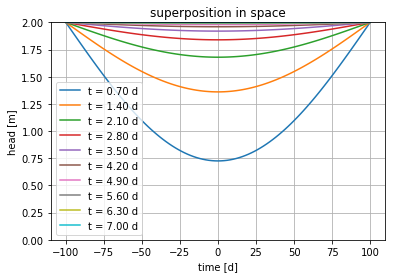

In [20]:
# using the erfc function, see syllabus page 62

plt.title('superposition in space')
plt.xlabel('time [d]')
plt.ylabel('head [m]')
plt.grid()


for t in times:
    s = np.zeros_like(x)
    for i in range(1, 11):
        ds = A * (-1)**(i-1) * (
            sp.erfc((L/2 * (2 * i -1) + x) * np.sqrt(S / (4 * kD * t))) +
            sp.erfc((L/2 * (2 * i -1) - x) * np.sqrt(S / (4 * kD * t))))
        s = s + ds
    plt.plot(x, s, label='t = {:4.2f} d'.format(t))

plt.legend()
plt.ylim(0, A)

plt.show()

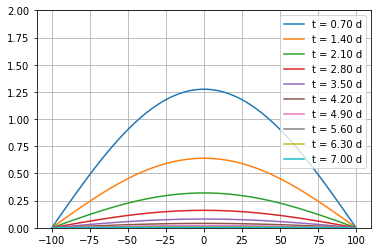

In [21]:
# Using the analytical solution on page 63 of the syllabus

b = L/2
for t in times:
    s = np.zeros_like(x)    
    for j in range(1, 11):
        ds = A * 4/np.pi * \
             (-1)**(j-1) / (2*j - 1) *\
             np.cos((2 * j -1) * np.pi/2 * x/b) *\
             np.exp(-(2 * j -1)**2 * (np.pi/2)**2 * kD/(b**2 * S) * t)
        s = s + ds
    plt.plot(x, s, label='t = {:4.2f} d'.format(t))
    
plt.legend()
plt.grid()
plt.ylim(0, A)
plt.show()

As you can see, both solutions are the same at least: you get the second one when you subtact the first one from A (A=2 m), alternatively, you get the first one of you subtract the second one from A.